In [2]:
import sys
import importlib
sys.path.append('../PyScripts/')

import utils.function_library 
importlib.reload(utils.function_library)
from utils.function_library import *

In [3]:
#1sigma errors
# make another function of this for the plot
omega_m_symerr = 0.5*(0.065+0.033)
sigma8_symerr = 0.5*(0.084+0.107)
n_s_symerr = 0.5*(0.093+0.049)
omega_b_symerr = 0.5*(0.005+0.000)#Omega_b*h**2 = 0.046*h**2
h_symerr = 0.5*(0.110+0.001)
A_ia_symerr = 0.5 *(0.321 + 0.374)
bestfit_sigmas = [omega_m_symerr, sigma8_symerr, n_s_symerr, omega_b_symerr, h_symerr, A_ia_symerr]
label_list = [r"$\Omega_m$", r"$\sigma_8$", r"$n_s$", r"$\Omega_b$", r"$h$", r"$A_ia$"]

#load shift matrices
shift_matrix_up = np.load("parameter_shifts_1.05_class3.0_closer_derivative.npy")
shift_matrix_down = np.load("parameter_shifts_0.95_class3.0_closer_derivative.npy")

#shift_matrix_up = np.load("parameter_shifts_1.05_flatsky_sigmakids.npy")
#shift_matrix_down = np.load("parameter_shifts_0.95_flatsky_sigmakids.npy")


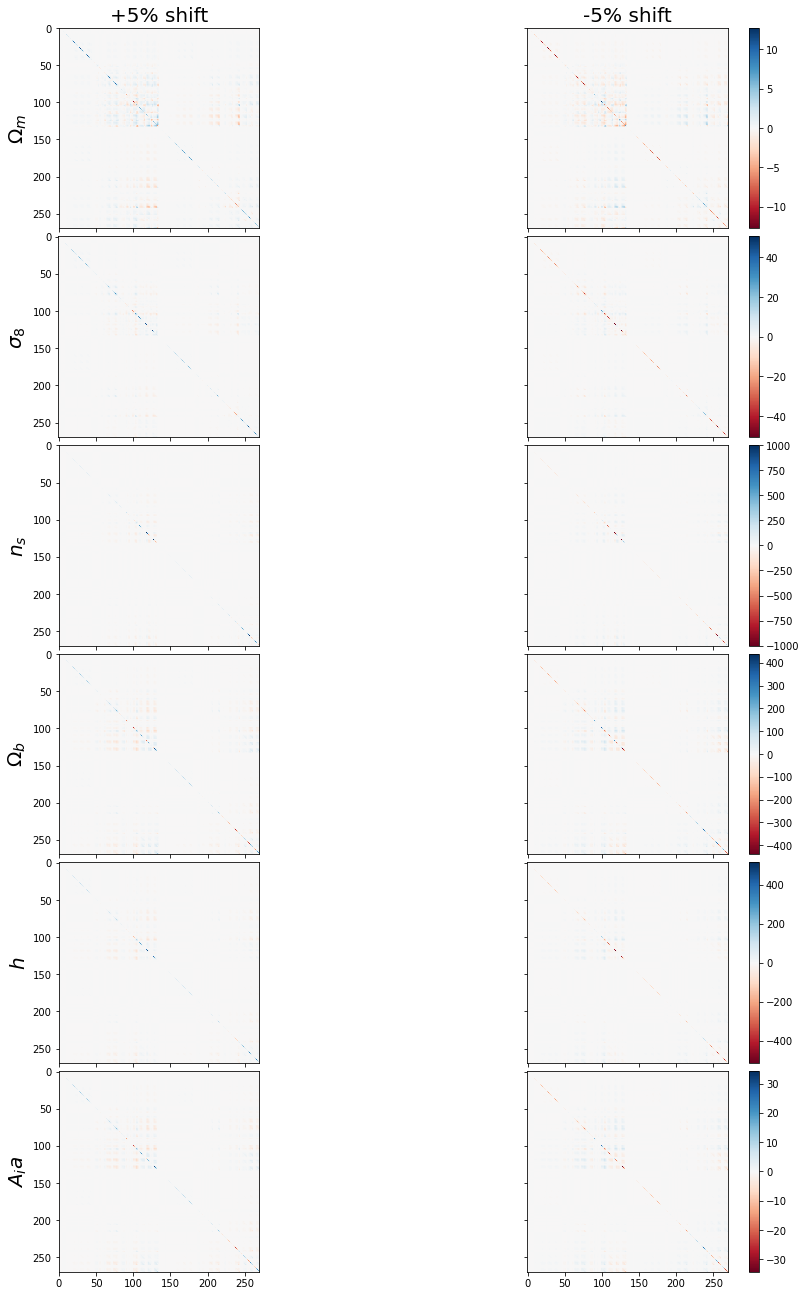

In [4]:
Nparams = 6
matrix_arrays_up = [shift_matrix_up[:,:,i]/bestfit_sigmas[i]*100 for i in range(Nparams)]
matrix_arrays_down = [shift_matrix_down[:,:,i]/bestfit_sigmas[i]*100 for i in range(Nparams)]

max_values = [np.max(np.append(matrix_arrays_up[i], matrix_arrays_down[i])) for i in range(Nparams)]
min_values = [np.min(np.append(matrix_arrays_up[i], matrix_arrays_down[i])) for i in range(Nparams)]
absmax_values = [np.max(np.abs(np.append(matrix_arrays_up[i], matrix_arrays_down[i]))) for i in range(Nparams)]

# define your scale, with white at zero
norm = colors.TwoSlopeNorm(vcenter=0) # Not used now
colormap='RdBu'
saturation_value = 1000

#fig, ax = plt.subplots(5,2, figsize=(9,18), sharex=True, sharey=True)
fig, ax = plt.subplots(Nparams,2, figsize=(12,18), sharex=True, sharey=True)

axes = plt.gca()
axes.yaxis.label.set_size(20)

for i in range(Nparams):
    for j in range(2):
        if j == 0:
            matrix = matrix_arrays_up[i]
            max_value, min_value = None, None
            
            #contrast = 0.5 # Smaller than 1 is saturation
            figplot = ax[i,j].imshow(matrix, cmap=colormap, #norm=norm,
                                     #vmax = max_values[i], vmin = min_values[i],
                                     #vmax = absmax_values[i]*contrast, vmin = -absmax_values[i]*contrast,
                                     vmax = np.min([absmax_values[i], saturation_value]),
                                     vmin = np.max([-absmax_values[i], -saturation_value]),
                                     interpolation='none')
            #fig.colorbar(figplot, ax=ax[i,j])
            
            ax[i,j].set_ylabel(label_list[i], fontsize=20)
            
        if j == 1:
            matrix = matrix_arrays_down[i]
            max_value, min_value = None, None
            
            figplot = ax[i,j].imshow(matrix, cmap=colormap, #norm=norm,
                                     #vmax = max_values[i], vmin = min_values[i], # This is min and max but the centre of the colorbar is not at zero (need to set norm well)
                                     #vmax = absmax_values[i]*contrast, vmin = -absmax_values[i]*contrast,  # This is the maximum of absolute min/max with a contrast multiplier to make saturated
                                     vmax = np.min([absmax_values[i], saturation_value]), # This is saturating if it is more than 500.
                                     vmin = np.max([-absmax_values[i], -saturation_value]),                                 
                                     interpolation='none')
            fig.colorbar(figplot, ax=ax[i,j])
            
#fig.subplots_adjust(wspace=0.05, hspace=0.05)
ax[0,0].set_title("+5% shift", fontsize=20)
ax[0,1].set_title("-5% shift", fontsize=20)

plt.subplots_adjust(top = 0.98, bottom = 0.02, right = 1, left = 0, hspace = 0.04, wspace = 0.05)
plt.margins(0,0)
#fig.savefig('all_shifts_sigma_units_flatksy.pdf')